## 1. Imports

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 2. Data

In [3]:
from PIL import Image
import torchvision.transforms as transforms

imsize = 256

img_transforms = transforms.Compose([
    transforms.Resize((imsize, imsize)),
    transforms.ToTensor(), # To (CxHxW) and scale 0-1
])

In [4]:
def image_loader(image_name):
    image = Image.open(image_name)
    image = img_transforms(image).unsqueeze(0)
    return image.to(device, torch.float)

style_img = image_loader("./data/vangogh.png")
content_img = image_loader("./data/husky.jpg")

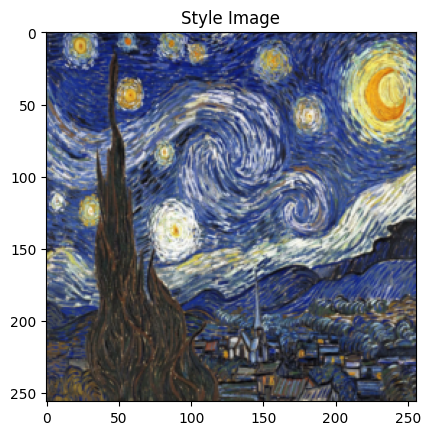

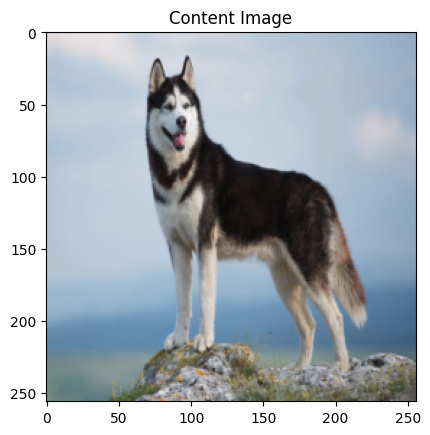

In [5]:
unloader = transforms.ToPILImage()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)


plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

## 3. Loss Functions

### 3.1 Content Loss

In [6]:
content_weight = 1e1
ContentLoss = nn.MSELoss()

### 3.2 Style Loss

In [7]:
def gram_matrix(tensor):
    a, b, c, d = tensor.size()
    tensor = tensor.view(a * b, c * d)
    G = torch.mm(tensor, tensor.t())
    return G.div(a * b * c * d)

style_weight = 1e7
StyleLoss = nn.MSELoss()

## 3. Model

In [8]:
from torchvision.models import vgg16, VGG16_Weights

VGG16_pretrained = vgg16(weights=VGG16_Weights.DEFAULT).features.eval()
for param in VGG16_pretrained.parameters():
    param.requires_grad_(False)

VGG16_pretrained.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [13]:
content_layers = ['conv_4']
style_layers = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

In [14]:
def get_features(pretrained_model, image):
    layers = {
        '0': 'conv_1',
        '5': 'conv_2',
        '10': 'conv_3',
        '19': 'conv_4',
        '28': 'conv_5'
    }
    features = {}
    x = image
    for name, pretrained_layer in pretrained_model._modules.items():
        x = pretrained_layer(x)
        if name in layers:
            features[layers[name]] = x
    return features


In [15]:
content_features = get_features(VGG16_pretrained, content_img)
style_features = get_features(VGG16_pretrained, style_img)

## 4. Training

In [16]:
import torch.optim as optim

target_img = content_img.clone().requires_grad_(True).to(device)
optimizer = optim.Adam([target_img], lr=0.02)


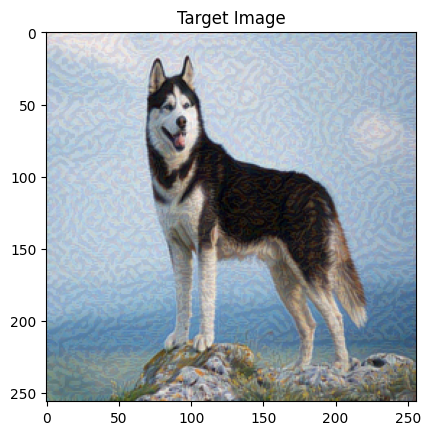

Epoch [100/3000] Total loss: 12.614876 - Content loss: 0.758343 - Style loss: 0.000001
Epoch [200/3000] Total loss: 11.820475 - Content loss: 0.701505 - Style loss: 0.000000


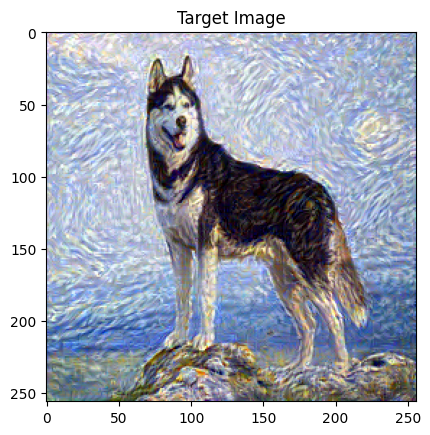

Epoch [300/3000] Total loss: 11.521442 - Content loss: 0.683539 - Style loss: 0.000000
Epoch [400/3000] Total loss: 11.357195 - Content loss: 0.675432 - Style loss: 0.000000
Epoch [500/3000] Total loss: 11.308899 - Content loss: 0.656128 - Style loss: 0.000000
Epoch [600/3000] Total loss: 11.228790 - Content loss: 0.668285 - Style loss: 0.000000
Epoch [700/3000] Total loss: 11.135777 - Content loss: 0.645178 - Style loss: 0.000000


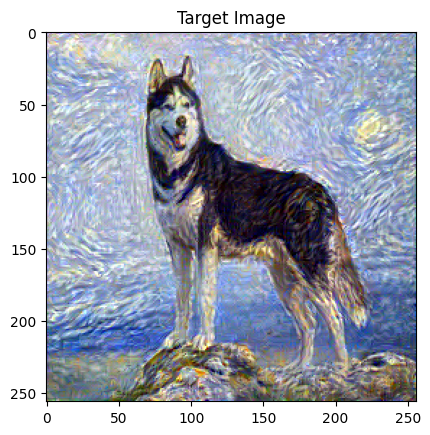

Epoch [800/3000] Total loss: 11.106766 - Content loss: 0.664773 - Style loss: 0.000000
Epoch [900/3000] Total loss: 11.038662 - Content loss: 0.644170 - Style loss: 0.000000
Epoch [1000/3000] Total loss: 11.041818 - Content loss: 0.645190 - Style loss: 0.000000
Epoch [1100/3000] Total loss: 10.964966 - Content loss: 0.638999 - Style loss: 0.000000
Epoch [1200/3000] Total loss: 10.888485 - Content loss: 0.629807 - Style loss: 0.000000


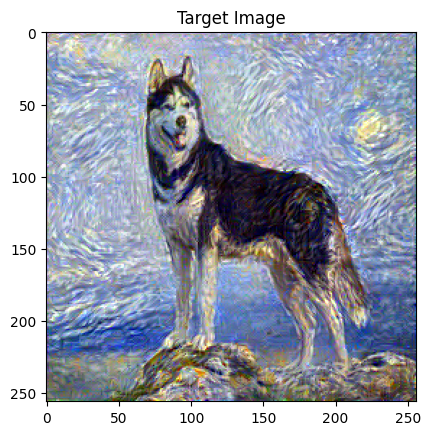

Epoch [1300/3000] Total loss: 10.940735 - Content loss: 0.639927 - Style loss: 0.000000
Epoch [1400/3000] Total loss: 10.950065 - Content loss: 0.636147 - Style loss: 0.000000
Epoch [1500/3000] Total loss: 10.823775 - Content loss: 0.626461 - Style loss: 0.000000
Epoch [1600/3000] Total loss: 10.937455 - Content loss: 0.614027 - Style loss: 0.000000
Epoch [1700/3000] Total loss: 10.883200 - Content loss: 0.634777 - Style loss: 0.000000


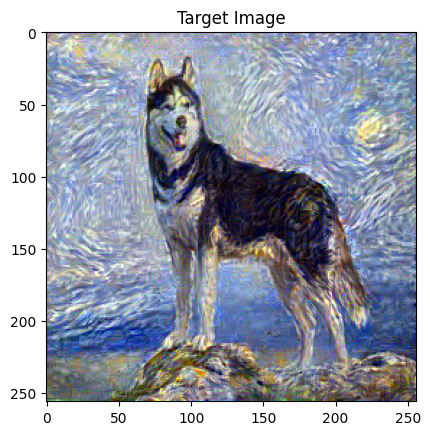

Epoch [1800/3000] Total loss: 10.792801 - Content loss: 0.622167 - Style loss: 0.000000
Epoch [1900/3000] Total loss: 10.794661 - Content loss: 0.632068 - Style loss: 0.000000
Epoch [2000/3000] Total loss: 10.881205 - Content loss: 0.616233 - Style loss: 0.000000
Epoch [2100/3000] Total loss: 10.860980 - Content loss: 0.619046 - Style loss: 0.000000
Epoch [2200/3000] Total loss: 10.688040 - Content loss: 0.624484 - Style loss: 0.000000


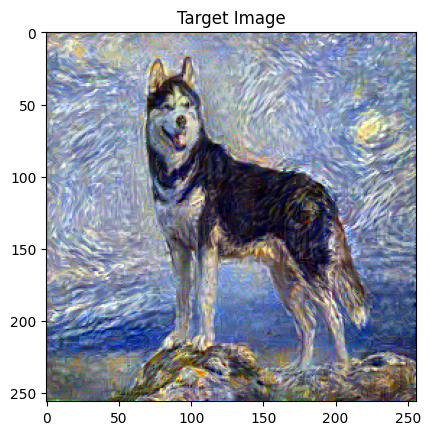

Epoch [2300/3000] Total loss: 10.763238 - Content loss: 0.616544 - Style loss: 0.000000
Epoch [2400/3000] Total loss: 10.811442 - Content loss: 0.611163 - Style loss: 0.000000
Epoch [2500/3000] Total loss: 10.729731 - Content loss: 0.610406 - Style loss: 0.000000
Epoch [2600/3000] Total loss: 10.690845 - Content loss: 0.618338 - Style loss: 0.000000
Epoch [2700/3000] Total loss: 11.417740 - Content loss: 0.682567 - Style loss: 0.000000


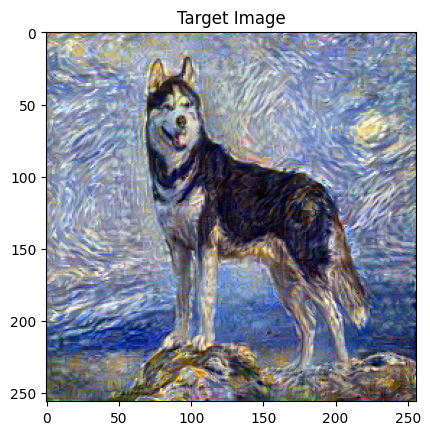

Epoch [2800/3000] Total loss: 10.696733 - Content loss: 0.626054 - Style loss: 0.000000
Epoch [2900/3000] Total loss: 10.745619 - Content loss: 0.623924 - Style loss: 0.000000
Epoch [3000/3000] Total loss: 10.649124 - Content loss: 0.623315 - Style loss: 0.000000


In [18]:
STEPS = 3000

hist = {
    'style_loss': [],
    'content_loss': [],
    'total_loss': []
}

for step in range(STEPS):
    optimizer.zero_grad()
    with torch.no_grad():
        target_img.clamp_(0, 1)
    target_features = get_features(VGG16_pretrained, target_img)

    content_loss = ContentLoss(content_features['conv_4'], target_features['conv_4'])

    style_loss = 0
    for layer in style_layers:
        target_gram = gram_matrix(target_features[layer])
        style_gram = gram_matrix(style_features[layer])
        style_loss += StyleLoss(style_gram, target_gram)

    total_loss = content_loss*content_weight + style_loss*style_weight
    hist['content_loss'].append(content_loss.item())
    hist['style_loss'].append(style_loss.item())
    hist['total_loss'].append(total_loss.item())

    total_loss.backward(retain_graph=True)
    optimizer.step()
    if step % 100 == 99:
        print(f"Epoch [{step+1}/{STEPS}] Total loss: {total_loss.item():.6f} - Content loss: {content_loss.item():.6f} - Style loss: {style_loss.item():.6f}")

    with torch.no_grad():
        target_img.clamp_(0, 1)

    # save earch 200 steps
    if step % 500 == 199 or step == 0:
        plt.figure()
        imshow(target_img, title='Target Image')
        plt.show()

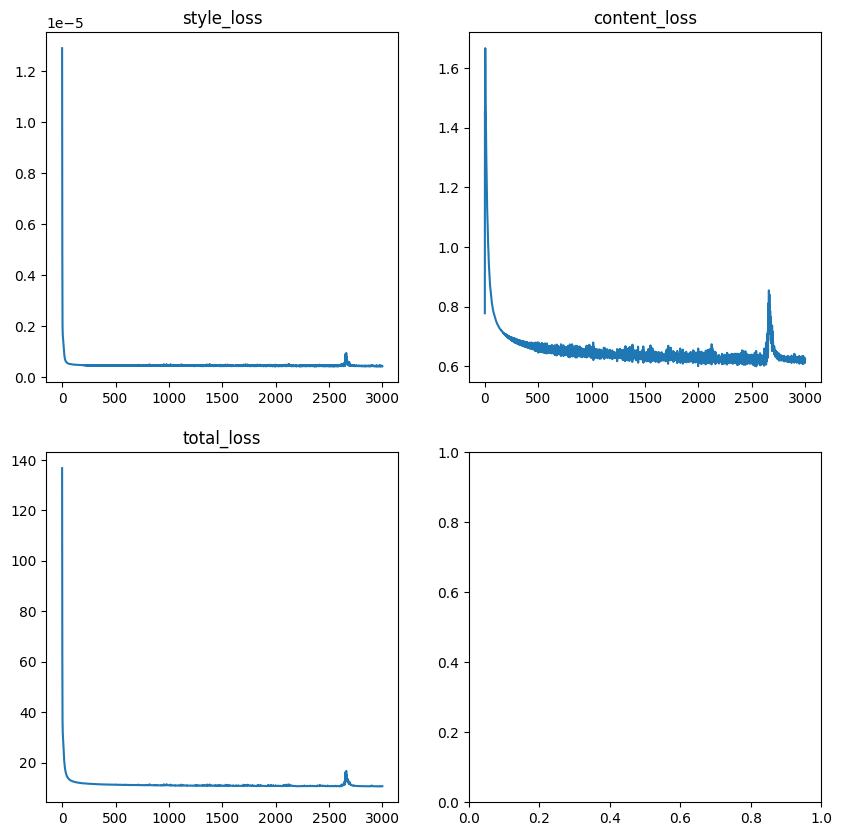

In [19]:
# Plotting the losses
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for i, key in enumerate(hist.keys()):
    ax[i//2, i%2].plot(hist[key])
    ax[i//2, i%2].set_title(key)
plt.show()